In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [44]:
df=pd.read_csv(r"C:\Users\LENOVO\Downloads\hotel_bookings 2.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [49]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [47]:
df['children'] = df['children'].fillna(df['children'].median())
df['country'] = df['country'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)

# Drop the 'company' column
data = df.drop(columns=['company'])


In [48]:
df=df.dropna()

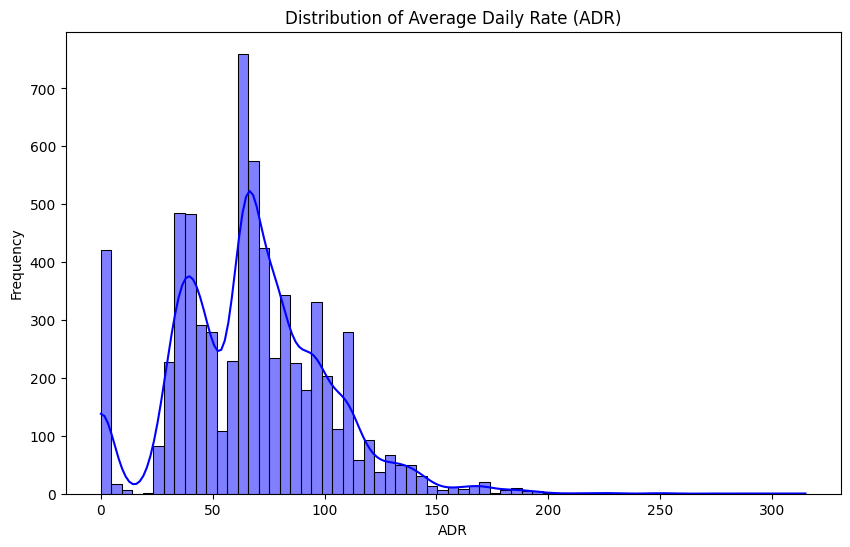

In [50]:
summary_stats = df.describe()

# Distribution of 'adr' (Average Daily Rate)
plt.figure(figsize=(10, 6))
sns.histplot(df['adr'], kde=True, color='blue')
plt.title('Distribution of Average Daily Rate (ADR)')
plt.xlabel('ADR')
plt.ylabel('Frequency')
plt.show()

In [51]:
#  total nights stayed
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df[['stays_in_weekend_nights', 'stays_in_week_nights', 'total_nights']].head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16616\3462702620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']


,stays_in_weekend_nights,stays_in_week_nights,total_nights
18,0,1,1
218,0,1,1
219,0,1,1
220,0,2,2
295,1,1,2


**Booking Distribution by Hotel Type**

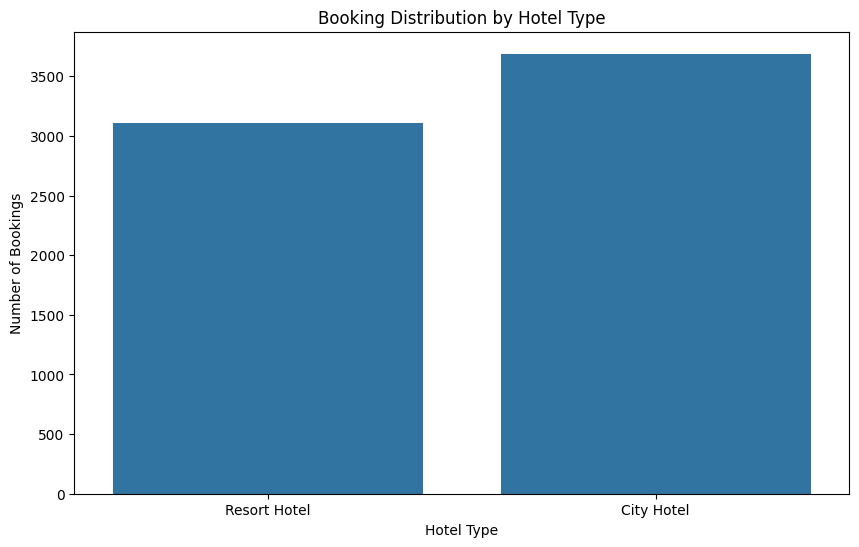

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hotel', data=df)
plt.title('Booking Distribution by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()

**Average Daily Rate by Hotel Type**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16616\3947302725.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hotel', y='adr', data=df, palette='coolwarm')


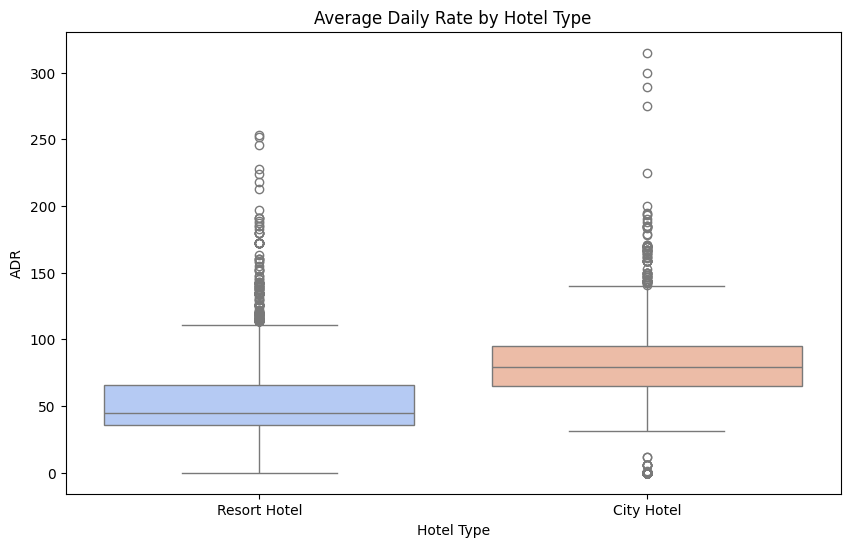

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='hotel', y='adr', data=df, palette='coolwarm')
plt.title('Average Daily Rate by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('ADR')
plt.show()


**Lead Time Distribution**

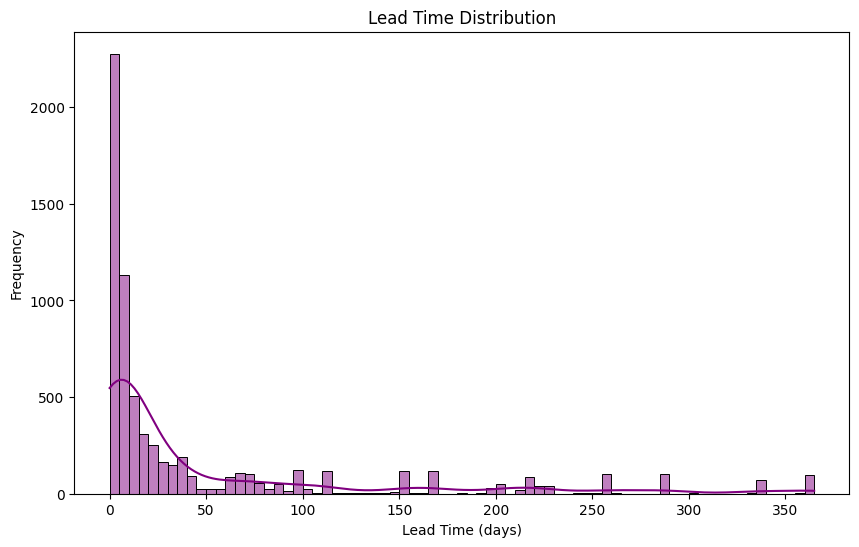

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], kde=True, color='purple')
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()


**Cancellation Rate by Deposit Type**

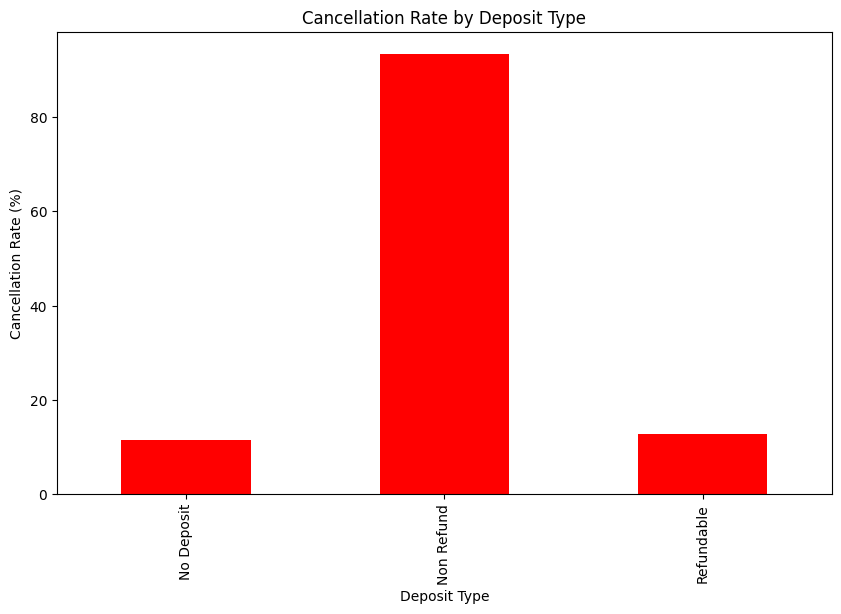

In [55]:
cancellation_rate = df.groupby('deposit_type')['is_canceled'].mean() * 100

plt.figure(figsize=(10, 6))
cancellation_rate.plot(kind='bar', color='red')
plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate (%)')
plt.show()


**Distribution of Total Nights Stayed**

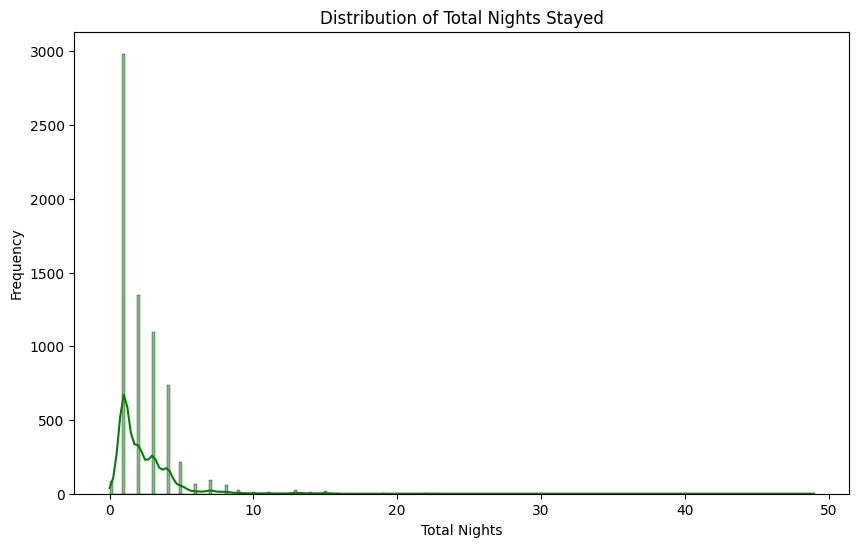

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df['total_nights'], kde=True, color='green')
plt.title('Distribution of Total Nights Stayed')
plt.xlabel('Total Nights')
plt.ylabel('Frequency')
plt.show()


**Booking Distribution by Market Segment**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16616\899354432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='market_segment', data=df, palette='viridis')


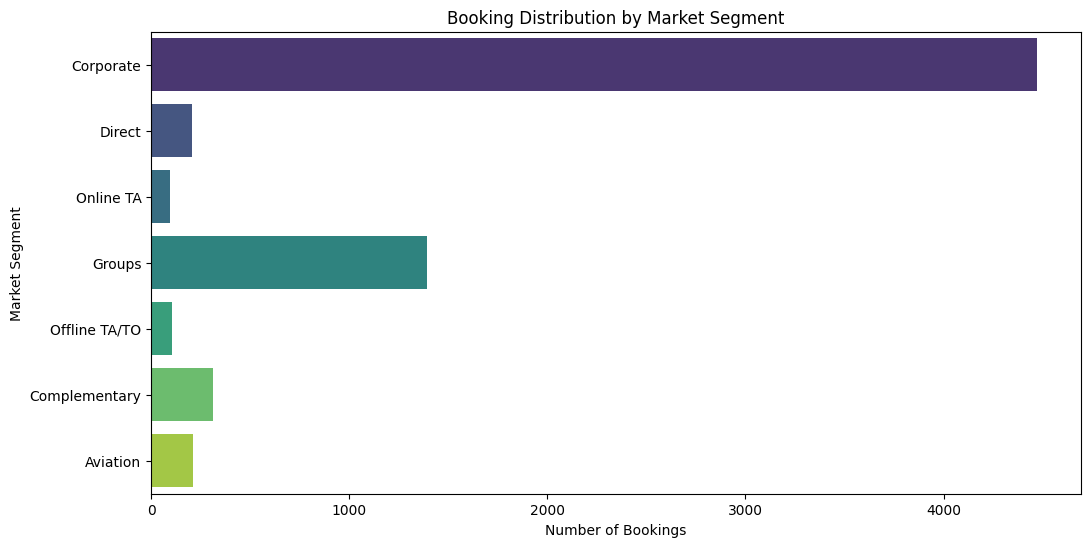

In [57]:
plt.figure(figsize=(12, 6))
sns.countplot(y='market_segment', data=df, palette='viridis')
plt.title('Booking Distribution by Market Segment')
plt.xlabel('Number of Bookings')
plt.ylabel('Market Segment')
plt.show()


**ADR vs. Lead Time**

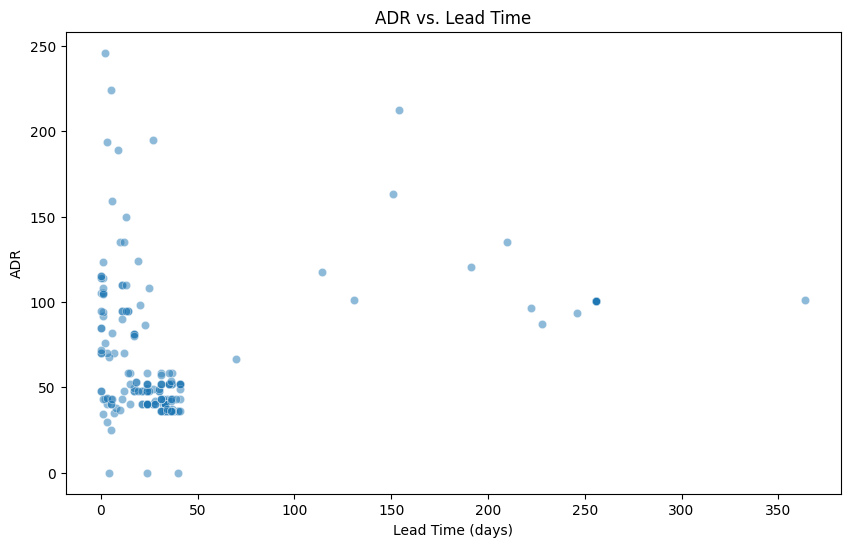

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='adr', data=df, alpha=0.5)
plt.title('ADR vs. Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('ADR')
plt.show()


**Bookings by Customer Type**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16616\2336840789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='customer_type', data=df, palette='muted')


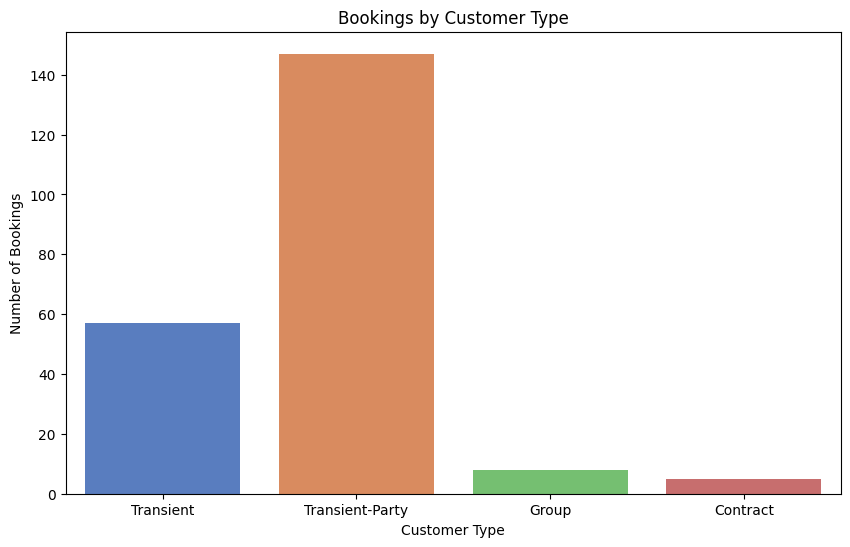

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', data=df, palette='muted')
plt.title('Bookings by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.show()
